<a href="https://colab.research.google.com/github/HongSeongMo/Bigdata_Analysis_Professional/blob/main/241101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제5과목 데이터 모형 평가

제1장 분류 분석 모형 평가

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64
Weight_in_gms,int64


In [4]:
df['Warehouse_block'] = df['Warehouse_block'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight': 0, 'Road': 1, 'Ship': 2})
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df.drop('Reached.on.Time_Y.N', axis='columns').to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
model = LinearRegression()
model.fit(x, y)
coefImportance = np.abs(model.coef_)
sortedFeature = np.argsort(coefImportance)[::-1]
print(sortedFeature)

[2 6 5 8 7 3 1 0 4 9]


In [9]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64
Weight_in_gms,int64


In [10]:
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scale, trainy)
prediction = model.predict(testx_scale)
result = pd.DataFrame(np.array([testy, prediction]).T, columns=['Actual', 'Predict'])
print(result.head(10))

   Actual  Predict
0       0        1
1       0        1
2       1        1
3       0        1
4       1        1
5       0        1
6       0        1
7       1        1
8       0        1
9       1        1


In [11]:
print(model.score(trainx_scale, trainy)*100)
print(model.score(testx_scale, testy)*100)
print(model.classes_)
print(model.coef_)
print(model.intercept_)

59.05961813222497
59.93939393939394
[0 1]
[[-0.12554142  0.04525028 -0.082258  ]]
[0.38195347]


In [27]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df.dtypes

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,0
Warehouse_block,object
Mode_of_Shipment,object
Customer_care_calls,int64
Customer_rating,int64
Cost_of_the_Product,int64
Prior_purchases,int64
Product_importance,object
Gender,object
Discount_offered,int64
Weight_in_gms,int64


   Actual  Predict
0       0        1
1       0        1
2       1        1
3       0        1
4       1        1
5       0        1
6       0        1
7       1        1
8       0        1
9       1        1
              precision    recall  f1-score   support

           0       0.39      0.02      0.04      1308
           1       0.60      0.98      0.75      1992

    accuracy                           0.60      3300
   macro avg       0.50      0.50      0.39      3300
weighted avg       0.52      0.60      0.47      3300

0.7471308339709258
0.5993939393939394
0.603522867737948
0.9804216867469879


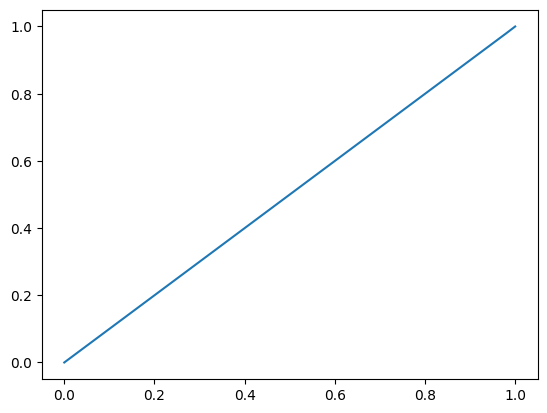

0.49976741829704135


In [28]:
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
trainx_scale = scaler.transform(trainx)
testx_scale = scaler.transform(testx)
model = LogisticRegression(C=20, max_iter=1000)
model.fit(trainx_scale, trainy)
prediction = model.predict(testx_scale)
result = pd.DataFrame(np.array([testy, prediction]).T, columns=['Actual', 'Predict'])
print(result.head(10))
print(classification_report(result['Actual'], result['Predict']))
print(f1_score(result['Actual'], result['Predict']))
print(accuracy_score(result['Actual'], result['Predict']))
print(precision_score(result['Actual'], result['Predict']))
print(recall_score(result['Actual'], result['Predict']))
fpr, tpr, thresholds = roc_curve(result['Actual'], result['Predict'])
plt.plot(fpr, tpr)
plt.show()
print(auc(fpr, tpr))

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
print(df.dtypes)
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
xtrainscaled = scaler.transform(trainx)
xtestscaled = scaler.transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
accuracy = accuracy_score(testy, ypred)
print(accuracy)
print(classification_report(testy, ypred))
resultsvm = pd.DataFrame(np.zeros((3300, 2)), columns=['Actual', 'Predict'])
resultsvm['Actual'] = pd.DataFrame(testy)
resultsvm['Predict'] = pd.DataFrame(ypred)
print(resultsvm.head())

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object
0.6051515151515151
              precision    recall  f1-score   support

           0       0.59      0.01      0.03      1308
           1       0.61      0.99      0.75      1992

    accuracy                           0.61      3300
   macro avg       0.60      0.50      0.39      3300
weighted avg       0.60      0.61      0.46      3300

   Actual  Predict
0       0        1
1       0        1
2       1        1
3       0        1
4       1        1


0.7524225726771803
0.6051515151515151
0.6053194741669214
0.9939759036144579


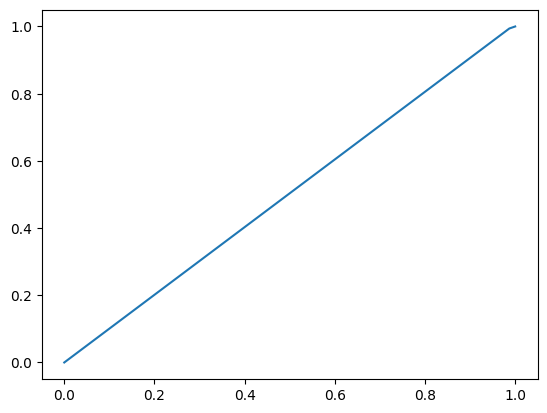

0.5034864227552412


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/work/train_commerce.csv', index_col=0)
df = data.dropna()
df['Product_importance'] = df['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].astype('category')
x = df[['Customer_care_calls','Product_importance','Prior_purchases']].to_numpy()
y = df['Reached.on.Time_Y.N'].to_numpy()
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.3, random_state=55)
scaler = StandardScaler()
scaler.fit(trainx)
xtrainscaled = scaler.transform(trainx)
xtestscaled = scaler.transform(testx)
model = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model.fit(xtrainscaled, trainy)
ypred = model.predict(xtestscaled)
print(f1_score(testy, ypred))
print(accuracy_score(testy, ypred))
print(precision_score(testy, ypred))
print(recall_score(testy, ypred))
fpr, tpr, thresholds = roc_curve(testy, ypred)
plt.plot(fpr, tpr)
plt.show()
print(auc(fpr, tpr))